# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Rafi Nanda Edtrian]
- **Email:** [mc308d5y1092@student.devacademy.id]
- **ID Dicoding:** [MC308D5Y1092]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan produk X dalam 6 bulan terakhir?
- Faktor-faktor apa saja yang memengaruhi kepuasan pelanggan?
- Bagaimana distribusi jumlah rental sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


## Data Wrangling

### Gathering Data

In [11]:
# Memuat tabel day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [12]:
#Menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

In [29]:
# Menghapus kolom yang tidak digunakan

drop_columns = ['instant','holiday', 'weekday', 'workingday', 'weathersit',
                'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

day_df = day_df.drop(columns=drop_columns)
hour_df = hour_df.drop(columns=drop_columns)

print(day_df.head())
print(hour_df.head())

      dteday  season  yr  mnth   cnt
0 2011-01-01       1   0     1   985
1 2011-01-02       1   0     1   801
2 2011-01-03       1   0     1  1349
3 2011-01-04       1   0     1  1562
4 2011-01-05       1   0     1  1600
       dteday  season  yr  mnth  hr  cnt
0  2011-01-01       1   0     1   0   16
1  2011-01-01       1   0     1   1   40
2  2011-01-01       1   0     1   2   32
3  2011-01-01       1   0     1   3   13
4  2011-01-01       1   0     1   4    1


In [30]:

# Mengubah dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [31]:

# Mengubah data int menjadi category
columns_day = ['season', 'yr', 'mnth']
columns_hour = ['season', 'yr', 'mnth', 'hr']

for column in columns_day:
    day_df[column] = day_df[column].astype("category")

for column in columns_hour:
    hour_df[column] = hour_df[column].astype("category")

In [32]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  731 non-null    datetime64[ns]
 1   season  731 non-null    category      
 2   yr      731 non-null    category      
 3   mnth    731 non-null    category      
 4   cnt     731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(1)
memory usage: 14.4 KB
None


In [33]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  17379 non-null  datetime64[ns]
 1   season  17379 non-null  category      
 2   yr      17379 non-null  category      
 3   mnth    17379 non-null  category      
 4   hr      17379 non-null  category      
 5   cnt     17379 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(1)
memory usage: 341.0 KB
None


In [13]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# Memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [34]:
# Mengubah nama kolom
day_df = day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
})

hour_df = hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count'
})

print(day_df.head())
print(hour_df.head())

     dateday season year month  count
0 2011-01-01      1    0     1    985
1 2011-01-02      1    0     1    801
2 2011-01-03      1    0     1   1349
3 2011-01-04      1    0     1   1562
4 2011-01-05      1    0     1   1600
     dateday season year month hour  count
0 2011-01-01      1    0     1    0     16
1 2011-01-01      1    0     1    1     40
2 2011-01-01      1    0     1    2     32
3 2011-01-01      1    0     1    3     13
4 2011-01-01      1    0     1    4      1


In [35]:
# Mengubah season
day_df['season'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

<ipython-input-35-717d814f895b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
<ipython-input-35-717d814f895b>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [36]:
# Mengubah year
day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

<ipython-input-36-133a40f77750>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
<ipython-input-36-133a40f77750>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})


In [37]:
# Mengubah month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

day_df['month'] = day_df['month'].replace(month_mapping)
hour_df['month'] = hour_df['month'].replace(month_mapping)


<ipython-input-37-de7fd0c0e6a1>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['month'] = day_df['month'].replace(month_mapping)
<ipython-input-37-de7fd0c0e6a1>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['month'] = hour_df['month'].replace(month_mapping)


In [38]:
print(day_df.head())
print(hour_df.head())

     dateday  season  year month  count
0 2011-01-01  spring  2011   Jan    985
1 2011-01-02  spring  2011   Jan    801
2 2011-01-03  spring  2011   Jan   1349
3 2011-01-04  spring  2011   Jan   1562
4 2011-01-05  spring  2011   Jan   1600
     dateday  season  year month hour  count
0 2011-01-01  spring  2011   Jan    0     16
1 2011-01-01  spring  2011   Jan    1     40
2 2011-01-01  spring  2011   Jan    2     32
3 2011-01-01  spring  2011   Jan    3     13
4 2011-01-01  spring  2011   Jan    4      1


## Exploratory Data Analysis (EDA)

### Explore ...

In [39]:
# melihat rangkuman parameter statistik
day_df.describe(include="all")

,dateday,season,year,month,count
count,731,731,731.0,731,731.000000
unique,NaN,4,2.0,12,NaN
top,NaN,fall,2012.0,Jan,NaN
freq,NaN,188,366.0,62,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,8714.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1:

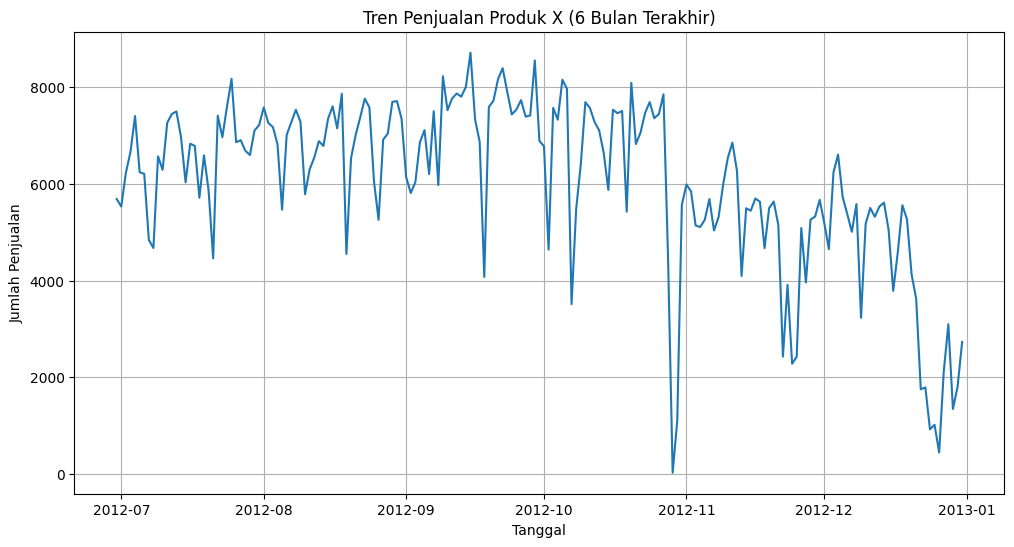

In [42]:
# --- Tren Penjualan Produk X (6 Bulan Terakhir) ---
# Mengubah tipe data kolom 'dateday' menjadi datetime
# day_df['dteday'] = pd.to_datetime(day_df['dteday']) day_df['dateday'] = pd.to_datetime(day_df['dateday']) 
# Filter data 6 bulan terakhir
six_months_ago = day_df['dateday'].max() - pd.DateOffset(months=6) # Corrected line using 'dateday'
filtered_data = day_df[day_df['dateday'] >= six_months_ago] # Corrected line using 'dateday'

# Plot tren penjualan
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['dateday'], filtered_data['count']) # Corrected line using 'count'
plt.title('Tren Penjualan Produk X (6 Bulan Terakhir)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

### Pertanyaan 2:

year     0.250495
hour     0.394071
count    1.000000
Name: count, dtype: float64


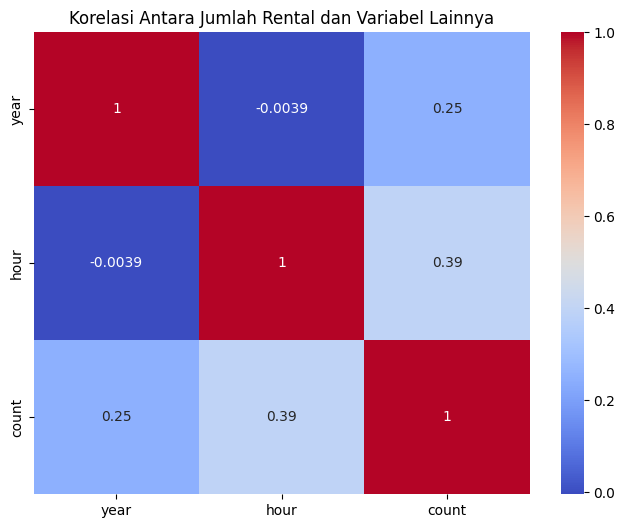

In [54]:
# --- Faktor-faktor yang Memengaruhi Jumlah Rental ---
correlation = hour_df[['year', 'hour', 'count']].corr() # Changed to only include numerical columns
print(correlation['count'])

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Jumlah Rental dan Variabel Lainnya')
plt.show()

season
spring     471348
summer     918589
fall      1061129
winter     841613
Name: count, dtype: int64


<ipython-input-55-dcc92039840f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_distribution = day_df.groupby('season')['count'].sum()


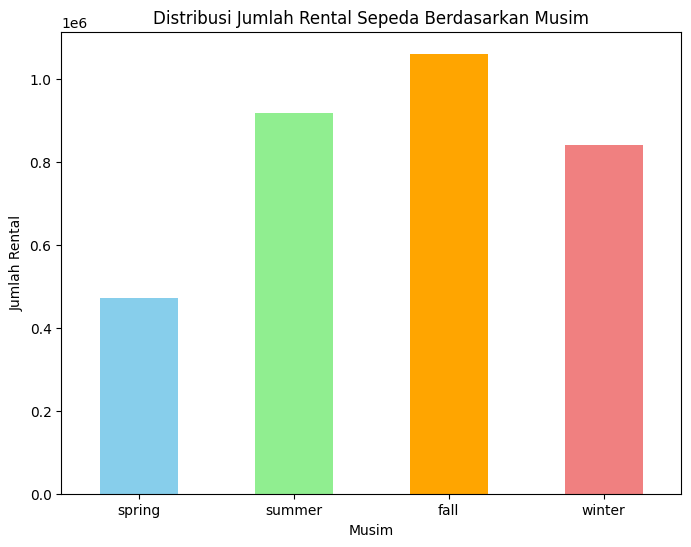

In [55]:
# --- Distribusi Jumlah Rental Sepeda Berdasarkan Musim ---

# 1. Menghitung jumlah rental per musim
seasonal_distribution = day_df.groupby('season')['count'].sum()
print(seasonal_distribution)

# 2. Visualisasi distribusi menggunakan bar chart
plt.figure(figsize=(8, 6))
seasonal_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribusi Jumlah Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.xticks(rotation=0)
plt.show()